# **Heart Disease Prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir())

['.config', 'sample_data']


II. Importing and understanding our dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Now you can access files in your Drive like this:
file_path = '/content/drive/MyDrive/heart.csv'
dataset = pd.read_csv(file_path)

# Verify the data is loaded
print(dataset.head())

Mounted at /content/drive
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.shape

(303, 14)

In [5]:
dataset.head(5) #peek at the first five rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5) #print 5 randomly select rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info() #gives concise overview of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [10]:
dataset["target"].describe()

,target
count,303.000000
mean,0.544554
std,0.498835
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [11]:
dataset["target"].unique()

array([1, 0])

In [12]:
print(dataset.corr()["target"].abs().sort_values(ascending=False)) #tells the strength of the relationship between each feature

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


**Exploratory Data Analysis (EDA)**

target
1    165
0    138
Name: count, dtype: int64


/tmp/ipython-input-13-1195295817.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=dataset ,palette='viridis')


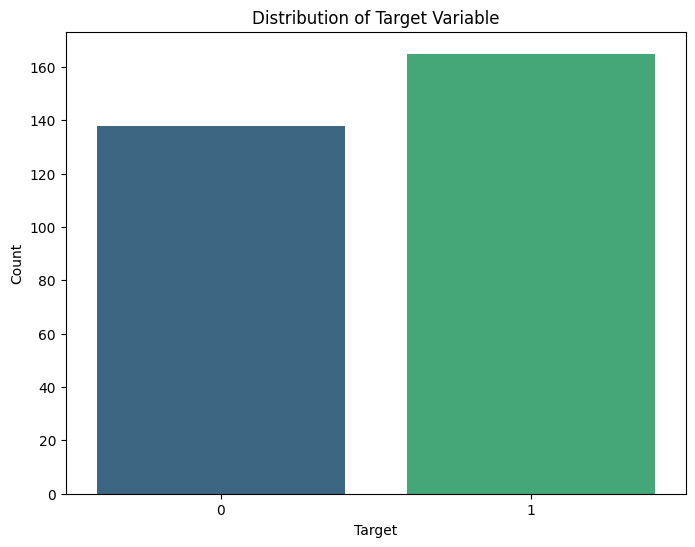

In [13]:
# Count the occurrences of 0 and 1 in the 'target' column
y = dataset["target"]
target_temp = y.value_counts()
print(target_temp)

#target = 1: Indicates the presence of heart disease.
#target = 0: Indicates the absence of heart disease.

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=dataset ,palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [14]:
#print the percentage of patients with and without heart problems in dataset.
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features
Analysing the 'Sex' **feature**

In [15]:
dataset["sex"].unique()

array([1, 0])

/tmp/ipython-input-16-276713414.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset["sex"], y=y,palette="pastel")


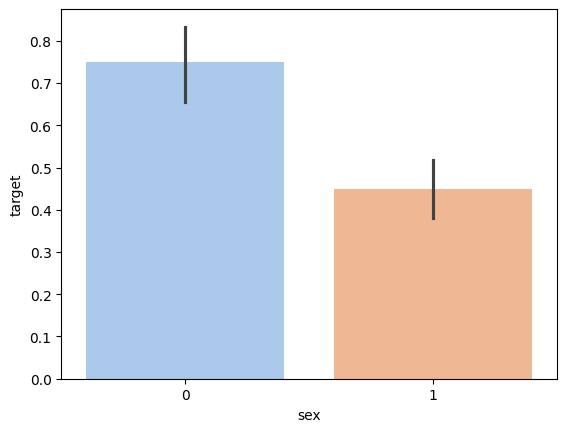

In [16]:
sns.barplot(x=dataset["sex"], y=y,palette="pastel")
plt.show()
#0: Female
#1: Male
#relationship between the "sex" column and your target variable

We notice, that females are more likely to have heart problems than males

**Analysing the 'Chest Pain Type' feature**

In [17]:
dataset["cp"].unique()

array([3, 2, 1, 0])

0: Typical angina
1: Atypical angina
2: Non-anginal pain
3: Asymptomatic

/tmp/ipython-input-18-2799173479.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset["cp"],y=y, palette="viridis")


<Axes: xlabel='cp', ylabel='target'>

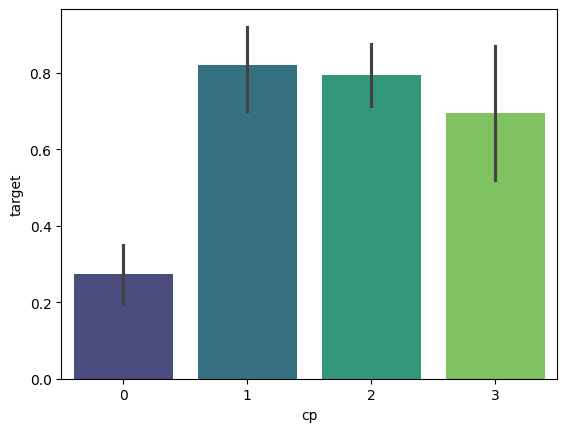

In [18]:
sns.barplot(x=dataset["cp"],y=y, palette="viridis")

**Analysing the FBS feature**

In [19]:
#fasting blood sugar
#0: Fasting blood sugar <= 120 mg/dl
#1: Fasting blood sugar > 120 mg/dl
dataset["fbs"].describe()

,fbs
count,303.000000
mean,0.148515
std,0.356198
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [20]:
dataset["fbs"].unique()

array([1, 0])

/tmp/ipython-input-21-4061549464.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset["fbs"],y=y, palette=colors1)


<Axes: xlabel='fbs', ylabel='target'>

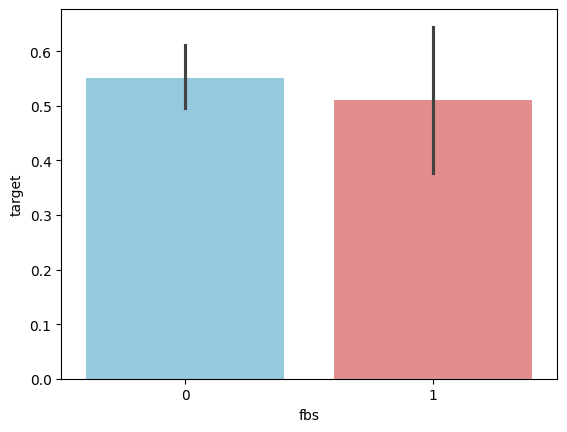

In [21]:
colors1 = ["skyblue", "lightcoral"]
sns.barplot(x=dataset["fbs"],y=y, palette=colors1)

0: Fasting blood sugar <= 120 mg/dl (False)
1: Fasting blood sugar > 120 mg/dl (True)

**Analysing the restecg feature**

In [22]:
dataset["restecg"].unique()

array([0, 1, 2])

This column represents the results of a resting electrocardiogram (ECG), a test that records the electrical activity of the heart.

0: Normal
1: ST-T wave abnormality (can indicate various heart conditions)
2: Left ventricular hypertrophy (enlarged heart muscle)

/tmp/ipython-input-23-1016594664.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset["restecg"],y=y,palette="pastel")


<Axes: xlabel='restecg', ylabel='target'>

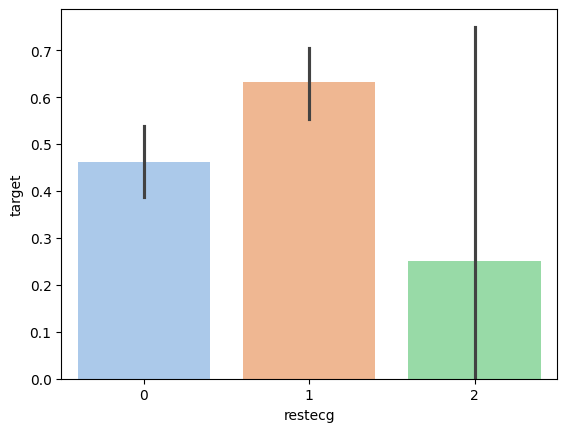

In [23]:
sns.barplot(x=dataset["restecg"],y=y,palette="pastel")

We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

Analysing the 'exang' **feature**

In [24]:
#This column typically indicates whether a patient experiences angina (chest pain) during exercise.
#0: No exercise-induced angina
#1: Exercise-induced angina
dataset["exang"].unique()

array([0, 1])

/tmp/ipython-input-25-2661680558.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="exang", y=y, data=dataset, palette= "dark")


<Axes: xlabel='exang', ylabel='target'>

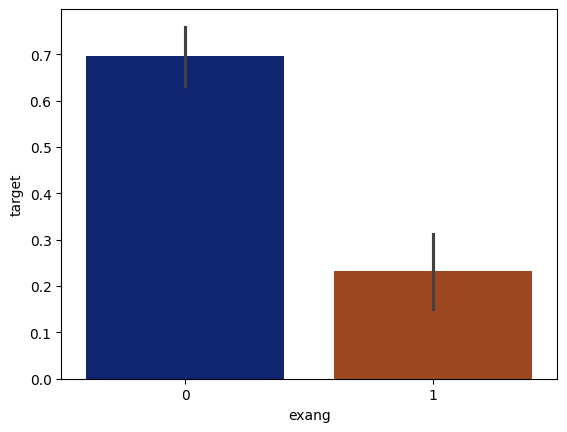

In [25]:
sns.barplot(x="exang", y=y, data=dataset, palette= "dark")

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

# Analysing the Slope **feature**

0: Upsloping

1: Flat

2: Downsloping

In [26]:
dataset["slope"].unique()

array([0, 2, 1])

/tmp/ipython-input-27-4272070468.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="slope", y="target", data=dataset,palette="muted") # Provide data, x, and y using keyword arguments


<Axes: xlabel='slope', ylabel='target'>

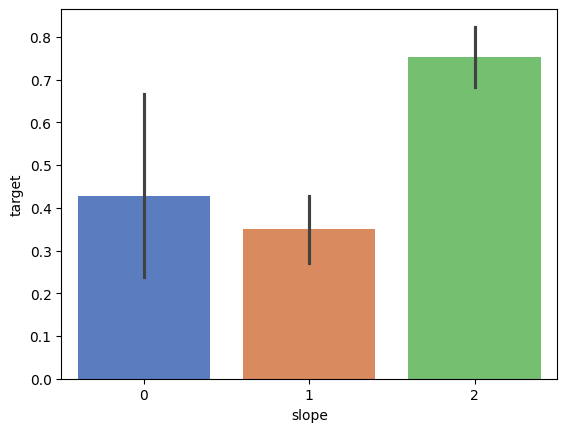

In [27]:
sns.barplot(x="slope", y="target", data=dataset,palette="muted") # Provide data, x, and y using keyword arguments

We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

# Analysing the 'ca' feature

In [28]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

/tmp/ipython-input-29-351519669.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ca", y="target", data=dataset,palette="pastel")


<Axes: xlabel='ca', ylabel='target'>

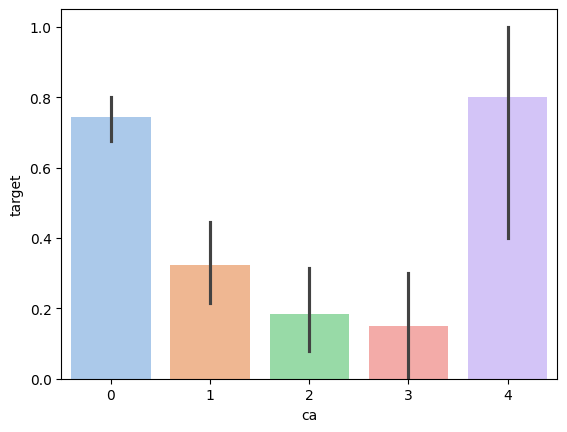

In [29]:
sns.barplot(x="ca", y="target", data=dataset,palette="pastel")

ca=4 has astonishingly large number of heart patients

/tmp/ipython-input-30-466765519.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="ca", data=dataset, palette="pastel")  # Store the plot as 'ax'


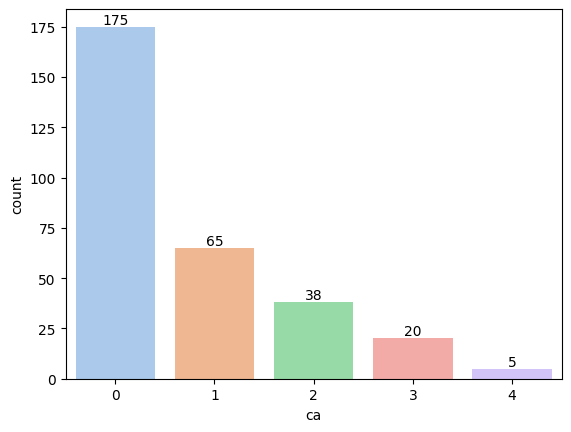

In [30]:
ax = sns.countplot(x="ca", data=dataset, palette="pastel")  # Store the plot as 'ax'

# Loop through the bar containers to annotate with count numbers
for container in ax.containers:
    ax.bar_label(container)

plt.show()  # Display the plot

# Analysing the 'thal' feature

In [31]:
dataset["thal"].unique()

array([1, 2, 3, 0])

/tmp/ipython-input-32-3200856470.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset["thal"], y=y,palette= "deep")  # Specify x and y using keyword arguments


<Axes: xlabel='thal', ylabel='target'>

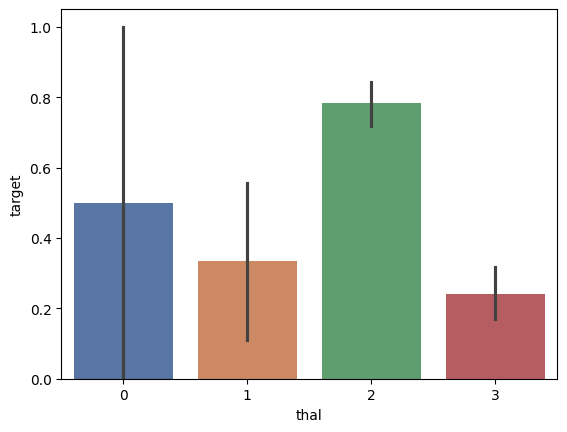

In [32]:
sns.barplot(x=dataset["thal"], y=y,palette= "deep")  # Specify x and y using keyword arguments

/tmp/ipython-input-33-4101355304.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["thal"])


<Axes: xlabel='thal', ylabel='Density'>

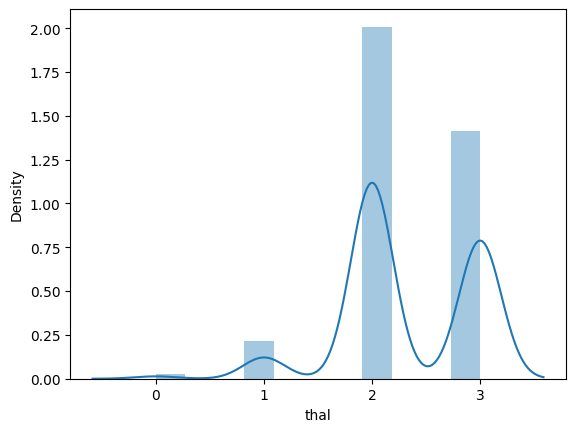

In [33]:
sns.distplot(dataset["thal"])

# IV. Train Test split

In [34]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [35]:
X_train.shape

(242, 13)

In [36]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2


In [37]:
X_test.shape

(61, 13)

In [38]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3


In [39]:
Y_train.shape

(242,)

In [40]:
Y_train.head()

,target
74,1
153,1
64,1
296,0
287,0


In [41]:
Y_test.shape

(61,)

In [42]:
Y_test.head()

,target
225,0
152,1
228,0
201,0
52,1


# V. Model Fitting

In [43]:
from sklearn.metrics import accuracy_score # calculates the accuracy of a model

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
lr.predict(X_test) #0: Absence of heart disease
                   #1: Presence of heart disease

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [46]:
lr.predict_proba(X_test)
#For example, if a row has values [0.85, 0.15], it means the model
# predicts an 85% probability of the patient not having heart disease and a 15% probability of having it.

array([[0.94968491, 0.05031509],
       [0.17512542, 0.82487458],
       [0.16043561, 0.83956439],
       [0.97655702, 0.02344298],
       [0.89841627, 0.10158373],
       [0.5637255 , 0.4362745 ],
       [0.9521549 , 0.0478451 ],
       [0.88295097, 0.11704903],
       [0.99439702, 0.00560298],
       [0.99591659, 0.00408341],
       [0.22011835, 0.77988165],
       [0.07619925, 0.92380075],
       [0.96658418, 0.03341582],
       [0.14061099, 0.85938901],
       [0.04655127, 0.95344873],
       [0.31191623, 0.68808377],
       [0.9391255 , 0.0608745 ],
       [0.25729781, 0.74270219],
       [0.99325389, 0.00674611],
       [0.14333118, 0.85666882],
       [0.16814857, 0.83185143],
       [0.72533466, 0.27466534],
       [0.92975367, 0.07024633],
       [0.89994004, 0.10005996],
       [0.14492752, 0.85507248],
       [0.57540833, 0.42459167],
       [0.82147948, 0.17852052],
       [0.68593231, 0.31406769],
       [0.02945254, 0.97054746],
       [0.34160043, 0.65839957],
       [0.

In [47]:
Y_pred_lr.shape

(61,)

In [48]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [49]:
# prompt: can you find Precision, Recall, F1-score , AUC-ROC of the above logistic regression

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Assuming Y_test and Y_pred_lr are already defined from the previous code
precision = precision_score(Y_test, Y_pred_lr)
recall = recall_score(Y_test, Y_pred_lr)
f1 = f1_score(Y_test, Y_pred_lr)

# Calculate AUC-ROC
try:
    auc_roc = roc_auc_score(Y_test, lr.predict_proba(X_test)[:, 1])
except ValueError: #Handle cases where there's only one class in Y_test
    auc_roc = 0

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")


Precision: 0.8571428571428571
Recall: 0.8823529411764706
F1-score: 0.8695652173913043
AUC-ROC: 0.9106753812636166


# Adding a new value and testing our data

In [50]:
import pandas as pd

# Function to safely get integer input
def get_int_input(prompt, min_val=None, max_val=None):
    while True:
        try:
            value = int(input(prompt))
            if min_val is not None and value < min_val:
                print(f"Please enter a value greater than or equal to {min_val}.")
            elif max_val is not None and value > max_val:
                print(f"Please enter a value less than or equal to {max_val}.")
            else:
                return value
        except ValueError:
            print("Invalid input. Please enter a whole number.")

# Function to safely get float input
def get_float_input(prompt, min_val=None, max_val=None):
    while True:
        try:
            value = float(input(prompt))
            if min_val is not None and value < min_val:
                print(f"Please enter a value greater than or equal to {min_val}.")
            elif max_val is not None and value > max_val:
                print(f"Please enter a value less than or equal to {max_val}.")
            else:
                return value
        except ValueError:
            print("Invalid input. Please enter a number (can be decimal).")

# --- Expected Data Ranges/Values ---
# ... (same as before) ...

person_data = {}

print("\nPlease enter the patient's data:")

person_data['age'] = [get_int_input("Enter Age (typically 29-77): ", min_val=29, max_val=77)]
person_data['sex'] = [get_int_input("Enter Sex (1: Male, 0: Female): ", min_val=0, max_val=1)]
person_data['cp'] = [get_int_input("Enter Chest pain type (0-3): ", min_val=0, max_val=3)]
person_data['trestbps'] = [get_int_input("Enter Resting blood pressure (mm Hg, typically 94-200): ", min_val=94, max_val=200)]
person_data['chol'] = [get_int_input("Enter Cholesterol (mg/dl, typically 126-564): ", min_val=126, max_val=564)]
person_data['fbs'] = [get_int_input("Enter Fasting blood sugar (0: <= 120 mg/dl, 1: > 120 mg/dl): ", min_val=0, max_val=1)]
person_data['restecg'] = [get_int_input("Enter Resting ECG results (0-2): ", min_val=0, max_val=2)]
person_data['thalach'] = [get_int_input("Enter Max heart rate achieved (typically 71-202): ", min_val=71, max_val=202)]
person_data['exang'] = [get_int_input("Enter Exercise-induced angina (0: No, 1: Yes): ", min_val=0, max_val=1)]
person_data['oldpeak'] = [get_float_input("Enter ST depression (oldpeak, typically 0.0-6.2): ", min_val=0.0, max_val=6.2)]
person_data['slope'] = [get_int_input("Enter ST slope (0-2): ", min_val=0, max_val=2)]
person_data['ca'] = [get_int_input("Enter Number of major vessels (ca, 0-3): ", min_val=0, max_val=3)]
person_data['thal'] = [get_int_input("Enter Thallium stress test result (thal, 1-3): ", min_val=1, max_val=3)]

# Create DataFrame from user input
person_df = pd.DataFrame(person_data)

# Ensure the columns are in the same order as your training data:
predictor_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
person_df = person_df[predictor_columns]

print("\nDataFrame created from user input:")
print(person_df)

# ... (rest of your code to use person_df for prediction) ...


Please enter the patient's data:
Enter Age (typically 29-77): 29
Enter Sex (1: Male, 0: Female): 1
Enter Chest pain type (0-3): 2
Enter Resting blood pressure (mm Hg, typically 94-200): 99
Enter Cholesterol (mg/dl, typically 126-564): 130
Enter Fasting blood sugar (0: <= 120 mg/dl, 1: > 120 mg/dl): 1
Enter Resting ECG results (0-2): 1
Enter Max heart rate achieved (typically 71-202): 111
Enter Exercise-induced angina (0: No, 1: Yes): 1
Enter ST depression (oldpeak, typically 0.0-6.2): 1
Enter ST slope (0-2): 1
Enter Number of major vessels (ca, 0-3): 1
Enter Thallium stress test result (thal, 1-3): 1

DataFrame created from user input:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   29    1   2        99   130    1        1      111      1      1.0      1   

   ca  thal  
0   1     1  


In [51]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your training data (X_train)
scaler.fit(X_train)

# Now you can use the scaler to transform data
person_scaled = scaler.transform(person_df)
person_scaled_df = pd.DataFrame(person_scaled, columns=predictor_columns)

In [52]:
prediction = lr.predict(person_scaled_df) # or person_df if not scaled
probability = lr.predict_proba(person_scaled_df)

if prediction[0] == 1:
    print("The person is predicted to have heart disease.")
else:
    print("The person is predicted to not have heart disease.")

print(f"Probability of heart disease: {probability[0][1]:.4f}")

The person is predicted to not have heart disease.
Probability of heart disease: 0.3945


**Random Forest**

In [53]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

#It tries out 2000 different random states for a Random Forest model
#For each random state, it trains the model, predicts on the test set, and calculates the accuracy.
#It keeps track of the random state that gives the highest accuracy.
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)
#Finally, it creates a new model using the best random state and trains it on the training data.
#This is the model that would be used for making predictions on new, unseen data.

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [54]:
# prompt: can you write a code to get Precision, Recall, F1-score, AUC-ROC of the above random forest

# Assuming Y_test and Y_pred_rf are already defined from the Random Forest part of your code

precision_rf = precision_score(Y_test, Y_pred_rf)
recall_rf = recall_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf)

# Calculate AUC-ROC for Random Forest
try:
    auc_roc_rf = roc_auc_score(Y_test, rf.predict_proba(X_test)[:, 1])
except ValueError: #Handle cases where there's only one class in Y_test
    auc_roc_rf = 0

print(f"Random Forest - Precision: {precision_rf}")
print(f"Random Forest - Recall: {recall_rf}")
print(f"Random Forest - F1-score: {f1_rf}")
print(f"Random Forest - AUC-ROC: {auc_roc_rf}")


Random Forest - Precision: 0.8888888888888888
Random Forest - Recall: 0.9411764705882353
Random Forest - F1-score: 0.9142857142857143
Random Forest - AUC-ROC: 0.9477124183006537


In [55]:
Y_pred_rf.shape

(61,)

In [56]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 90.16 %


In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already trained the 'best_rf' model using the previous code

# Define a function to get user input
def get_user_input():
    age = int(input("Enter your age: "))
    sex = int(input("Enter your sex (1 for male, 0 for female): "))
    cp = int(input("Enter your chest pain type (0-3): "))
    trestbps = int(input("Enter your resting blood pressure (mm Hg): "))
    chol = int(input("Enter your cholesterol level (mg/dl): "))
    fbs = int(input("Enter your fasting blood sugar (0: <= 120 mg/dl, 1: > 120 mg/dl): "))
    restecg = int(input("Enter your resting ECG results (0-2): "))
    thalach = int(input("Enter your maximum heart rate achieved: "))
    exang = int(input("Enter if you have exercise-induced angina (0: No, 1: Yes): "))
    oldpeak = float(input("Enter your ST depression induced by exercise relative to rest: "))
    slope = int(input("Enter your ST slope (0-2): "))
    ca = int(input("Enter the number of major vessels (0-3): "))
    thal = int(input("Enter your thalium stress test result (1-3): "))

    return [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]

# Get user input
user_input = get_user_input()

# Convert user input to a DataFrame
user_df = pd.DataFrame([user_input], columns=predictor_columns)  # Assuming predictor_columns is defined

# Scale the user data using the same scaler used for training
user_scaled = scaler.transform(user_df)  # Assuming 'scaler' is the StandardScaler object from training

# Initialize and train the best Random Forest model (if not already done)
best_rf = RandomForestClassifier(random_state=best_x) # Assuming best_x is defined from previous code
best_rf.fit(X_train, Y_train)  # Train the model

# Predict the heart disease risk
prediction = best_rf.predict(user_scaled)

# Print the prediction
if prediction == 0:
    print("You are predicted to have a low risk of heart disease.")
else:
    print("You are predicted to have a high risk of heart disease.")

Enter your age: 22
Enter your sex (1 for male, 0 for female): 1
Enter your chest pain type (0-3): 1
Enter your resting blood pressure (mm Hg): 120
Enter your cholesterol level (mg/dl): 111
Enter your fasting blood sugar (0: <= 120 mg/dl, 1: > 120 mg/dl): 1
Enter your resting ECG results (0-2): 1
Enter your maximum heart rate achieved: 130
Enter if you have exercise-induced angina (0: No, 1: Yes): 1
Enter your ST depression induced by exercise relative to rest: 1
Enter your ST slope (0-2): 1
Enter the number of major vessels (0-3): 1
Enter your thalium stress test result (1-3): 1
You are predicted to have a low risk of heart disease.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [58]:
!pip install gradio --quiet

In [59]:
import gradio as gr
import pandas as pd
from sklearn.preprocessing import StandardScaler  # If you used scaling during training
# ... (Import other necessary libraries like your model, etc.)

In [60]:
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    # Create a DataFrame from user input
    input_data = pd.DataFrame([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]],
                              columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])

    # Scale the input data if you used scaling during training
    # input_data_scaled = scaler.transform(input_data)  # Assuming 'scaler' is your StandardScaler object

    # Make prediction using your model (replace 'your_model' with your actual model)
    prediction = lr.predict(input_data)[0] # Assuming 'lr' is your trained Logistic Regression model


    # Return the prediction
    if prediction == 0:
        return "The person is predicted to not have heart disease."
    else:
        return "The person is predicted to have heart disease."

In [61]:
iface = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Number(label="Age"),  # Changed from gr.inputs.Number to gr.Number
        gr.Number(label="Sex (1: Male, 0: Female)"),  # Changed from gr.inputs.Number to gr.Number
        gr.Number(label="Chest pain type (0-3)"),  # Changed from gr.inputs.Number to gr.Number
        gr.Number(label="Resting blood pressure (mm Hg)"),  # Changed from gr.inputs.Number to gr.Number
        gr.Number(label="Cholesterol (mg/dl)"),  # Changed from gr.inputs.Number to gr.Number
        gr.Number(label="Fasting blood sugar (0: <= 120 mg/dl, 1: > 120 mg/dl)"),  # Changed from gr.inputs.Number to gr.Number
        gr.Number(label="Resting ECG results (0-2)"),  # Changed from gr.inputs.Number to gr.Number
        gr.Number(label="Max heart rate achieved"),  # Changed from gr.inputs.Number to gr.Number
        gr.Number(label="Exercise-induced angina (0: No, 1: Yes)"),  # Changed from gr.inputs.Number to gr.Number
        gr.Number(label="ST depression (oldpeak)"),  # Changed from gr.inputs.Number to gr.Number
        gr.Number(label="ST slope (0-2)"),  # Changed from gr.inputs.Number to gr.Number
        gr.Number(label="Number of major vessels (ca, 0-3)"),  # Changed from gr.inputs.Number to gr.Number
        gr.Number(label="Thallium stress test result (thal, 1-3)")  # Changed from gr.inputs.Number to gr.Number
    ],
    outputs="text",
    title="Heart Disease Prediction",
    description="Enter patient details to predict heart disease risk."
)

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8d7d9b972fcc317f28.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Heart Disease Prediction

This project focuses on predicting the presence of heart disease using a dataset containing various health parameters. The goal is to build a classification model that can accurately predict whether a patient has heart disease based on their medical information.

## Dataset

The dataset used in this project is the Heart Disease Dataset, which includes the following features:

- age: Age of the patient
- sex: Sex of the patient (1 = male, 0 = female)
- cp: Chest pain type (0-3)
- trestbps: Resting blood pressure (mm Hg)
- chol: Serum cholesterol (mg/dl)
- fbs: Fasting blood sugar (> 120 mg/dl)
- restecg: Resting electrocardiographic results (0-2)
- thalach: Maximum heart rate achieved
- exang: Exercise-induced angina (1 = yes, 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: The slope of the peak exercise ST segment (0-2)
- ca: Number of major vessels (0-3) colored by flourosopy
- thal: Thallium stress test result (1 = normal, 2 = fixed defect, 3 = reversable defect)
- target: Diagnosis of heart disease (1 = present, 0 = absent)

## Project Steps

1.  **Data Loading and Understanding**: Load the dataset and perform initial exploration to understand its structure and features.
2.  **Exploratory Data Analysis (EDA)**: Analyze the relationships between features and the target variable using visualizations and statistical methods.
3.  **Data Preprocessing**: Prepare the data for model training, which may include handling missing values, scaling, and encoding categorical features.
4.  **Model Fitting**: Train different classification models to predict heart disease. In this project, we specifically used:
    - Logistic Regression
    - Random Forest
5.  **Model Evaluation**: Evaluate the performance of the trained models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.
6. **Gradio Interface**: Build a user-friendly interface using Gradio to allow interactive predictions based on user input.

## How to Run

1. Clone the repository.
2. Install the required libraries: `pip install numpy pandas matplotlib seaborn scikit-learn gradio`
3. Run the Jupyter notebook.
4. The Gradio interface will launch, allowing you to input patient data and get a heart disease prediction.

## Results

The project includes the evaluation results for the trained models, demonstrating their accuracy and other performance metrics.

## Future Work

- Explore other classification algorithms.
- Perform hyperparameter tuning to improve model performance.
- Investigate feature engineering techniques.
- Deploy the model as a web application for wider access.